# KNN Models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../lib')

import numpy as np
import pandas as pd

import torch
import pytorch_common.util as pu

import model as ml
import data.dataset as ds

from sklearn.metrics import mean_squared_error, mean_absolute_error

<Figure size 432x288 with 0 Axes>

In [3]:
pu.LoggerBuilder().on_console().build()

<RootLogger root (INFO)>

In [4]:
pu.set_device_name('gpu')
cpu = torch.device("cpu")

In [5]:
pu.get_device()

device(type='cuda', index=0)

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.__version__

'1.11.0'

## Carga de dataset

1. importamos los archivos de peliculas y ratings preprocesados prebiamente en mongodb:

In [8]:
def features_fn(obs, device): return torch.tensor(obs[['user_seq', 'movie_seq']].values).to(device)
def target_fn(obs, device):   return torch.tensor(obs['user_movie_rating'].values).to(device)

In [9]:
dataset = ds.MovieLensTMDbJSONDataset(transform=features_fn, target_transform=target_fn, device=cpu)

In [10]:
predictor = ml.KNNUserBasedPredictor.from_data_frame(
    data          = dataset.data,
    user_seq_col  = 'user_seq',
    movie_seq_col = 'movie_seq',
    rating_col    = 'user_movie_rating',
    distance      = ml.CosineDistance()
)

build ratting matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 199791/199791 [100%] in 9.2s (21816.85/s)               
build distances matrix |▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 13280/13280 [100%] in 3:09.3 (70.14/s)                 [1%] in 1s (214.7/s, eta: 58s) (76.5/s, eta: 2:42) →↘↓ 868/13280 [7%] in 11s (76.4/s, eta: 2:42) 875/13280 [7%] in 11s (76.3/s, eta: 2:43) ↙←↖ 879/13280 [7%] in 12s (76.4/s, eta: 2:42) ←↖↑ 882/13280 [7%] in 12s (76.3/s, eta: 2:42) ↓↙← 988/13280 [7%] in 13s (75.6/s, eta: 2:43) ↙←↖ 991/13280 [7%] in 13s (75.6/s, eta: 2:43) ↗→↘ 1005/13280 [8%] in 13s (75.5/s, eta: 2:43) (75.4/s, eta: 2:43) (75.4/s, eta: 2:43) 1033/13280 [8%] in 14s (75.3/s, eta: 2:43) 1037/13280 [8%] in 14s (75.4/s, eta: 2:43) ↓↙← 1044/13280 [8%] in 14s (75.3/s, eta: 2:42) 1047/13280 [8%] in 14s (75.3/s, eta: 2:43) ↖↑↗ 1082/13280 [8%] in 14s (75.1/s, eta: 2:42) |▉▉▉▎                                    | ↑↗→ 1086/13280 [8%] in 14s (75.1/s, eta: 2:42) |▉▉▉▎                              

<Figure size 720x432 with 2 Axes>

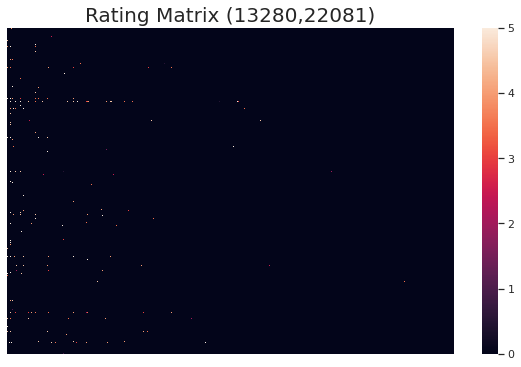

<Figure size 720x720 with 2 Axes>

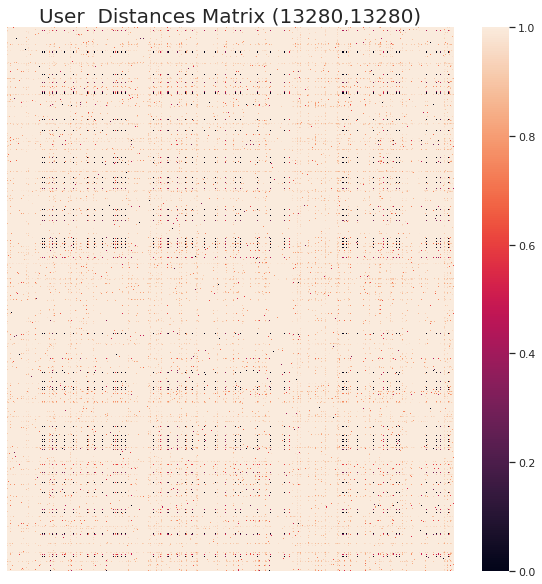

In [11]:
predictor.plot()

In [12]:
n_samples   = 200
n_neighbors = 5000
batch_size  = 10

validator = ml.Validator(
    n_samples, 
    batch_size,
    metrics_fn = {
        'mse': mean_squared_error,
        'mae': mean_absolute_error
    },
    predictors=[predictor]
)

In [13]:
summary = validator.validate(dataset, n_neighbors=n_neighbors)

|▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 200/200 [100%] in 4:05.8 (0.81/s)                                            


Predictor: KNNUserBasedPredictor

Range: (0.17758607509925356, 4.536964564952456)



<Figure size 1080x288 with 2 Axes>

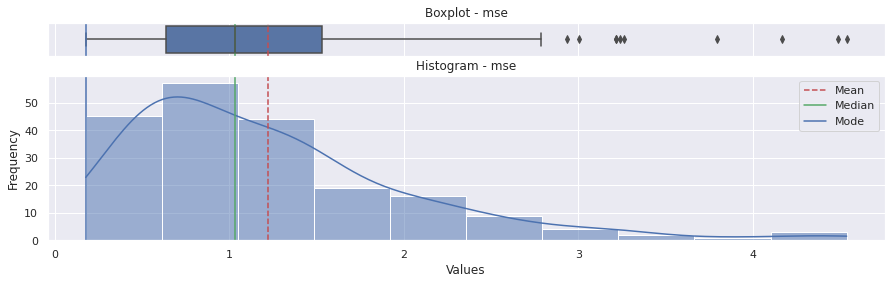


Metrics:



,mse
count,200.000000
mean,1.223846
std,0.819749
min,0.177586
25%,0.637795
50%,1.033264
75%,1.528901
max,4.536965



Range: (0.3262347936630249, 1.5380710124969483)



<Figure size 1080x288 with 2 Axes>

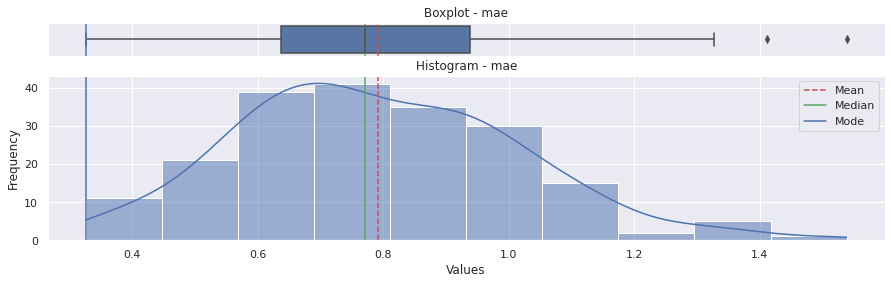


Metrics:



,mae
count,200.000000
mean,0.791988
std,0.221848
min,0.326235
25%,0.636880
50%,0.770278
75%,0.938743
max,1.538071


In [14]:
summary.plot()